<a href="https://colab.research.google.com/github/myusuf1982/Prediksi-Saham/blob/main/Tinggal_Fit%20belum%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from keras.layers import Input, LSTM, Concatenate, Dense
from keras.models import Model
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# data preparation
data = pd.read_csv("/content/drive/My Drive/GOOG-year.csv")
data =data[:10] # Juml row maksimal yang mau diambil sample 15 row

# memilih kolom open dan close saja
#data = data[['Open', 'Close','High','Low','Adj Close']] # all = Tanggal,Open,High,Low,Close,Adj Close,Volume
data = data[['Open']]
data.head()

scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)
print(data)

[[0.70656182]
 [0.45882406]
 [0.08348419]
 [0.62285117]
 [0.82420912]
 [0.7459281 ]
 [1.        ]
 [0.21651594]
 [0.19524893]
 [0.        ]]


In [ ]:
# membuat dataset dengan 90% data training dan 10% data testing
train_size = int(len(data) * 0.9) #226 total 252
train_data = data[:train_size] # 90% = 226 -252 = 26
test_data = data[train_size:]


# membuat dataset dengan input dan output
def create_dataset(data, look_back=1):
    dataX, dataY = [], []
    for i in range(len(data) - look_back): # print(len(data)) =252
        dataX.append(data[i:(i + look_back),:])
        dataY.append(data[i + look_back, :])
        
    #return np.array(dataX), np.array(dataY)
    return np.array(dataX), np.array(dataY)

# membuat dataset dengan input 2 hari sebelumnya dan output hari berikutnya
look_back = 2
trainX, trainY = create_dataset(train_data, look_back) #226,2
testX, testY = create_dataset(test_data, look_back)   #252,2
print(trainX)

In [ ]:
# membuat dataset dengan 90% data training dan 10% data testing
train_size = int(len(data) * 0.9) #226 total 252
train_data = data[:train_size] # 90% = 226 -252 = 26
test_data = data[train_size:]

original_array=np.array(train_data)
new_array = original_array.ravel()
print(new_array)

#input data
open_data =new_array # data['Open'].values
close_data = new_array # data['Close'].values
high_data = new_array # data['High'].values
low_data = new_array # data['Low'].values
volume_data = new_array #  data['Volume'].values

#reshape data
open_data = open_data.reshape((len(open_data), 1,1))
close_data = close_data.reshape((len(close_data),1, 1))
high_data = high_data.reshape((len(high_data), 1,1))
low_data = low_data.reshape((len(low_data), 1,1))
volume_data = volume_data.reshape((len(volume_data),1, 1))
print(open_data)

In [ ]:
#input layer / Setting variable jadi 3 dimensi
open_in = Input(shape=(1,1))
close_in = Input(shape=(1,1))
high_in = Input(shape=(1,1))
low_in = Input(shape=(1,1))
volume_in = Input(shape=(1,1))

#LSTM layer
open_lstm = LSTM(50)(open_in)
close_lstm = LSTM(50)(close_in)
high_lstm = LSTM(50)(high_in)
low_lstm = LSTM(50)(low_in)
volume_lstm = LSTM(50)(volume_in)



In [ ]:
#concatenate layer
merged = Concatenate()([open_lstm, close_lstm, high_lstm, low_lstm, volume_lstm])

#output layer
output = Dense(1)(merged)

#model
model = Model([open_in, close_in, high_in, low_in, volume_in], output)
model.compile(loss='mean_absolute_error', optimizer='adam')

#fit model
model.fit([open_data, close_data, high_data, low_data, volume_data], data['open_data'], epochs=10, batch_size=32)
#model.fit([open_data, close_data, high_data, low_data, volume_data], data['Next_Close'], epochs=10, batch_size=32) # buatkan datanya

IndexError: ignored

8/8 [==============================] - 1s 2ms/step - loss: 834.5405
Absolute Mean Error:  834.5404663085938


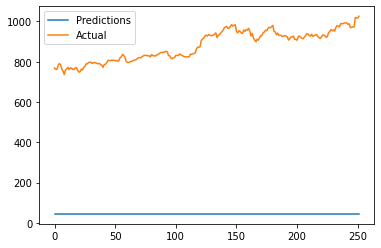

In [ ]:
#predict
predictions = model.predict([open_data, close_data, high_data, low_data, volume_data])

#evaluate
error = model.evaluate([open_data, close_data, high_data, low_data, volume_data], data['Close'])
print("Absolute Mean Error: ", error)

#plot
plt.plot(predictions, label='Predictions')
#plt.plot(data['Next_Close'], label='Actual')
plt.plot(data['Close'], label='Actual') # buatkan datanya
plt.legend()
plt.show()